<a href="https://colab.research.google.com/github/AniketRao/Amazon-Alexa-Review-Analysis-NLP-/blob/main/Copy_of_Amazon_Alxa_Review_(NLP)_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Alexa Reviews(Using NLP)

# 1.Description

The data of the reviews of the customers was obtained from Amazon in order to classify the feedbacks of the consumers. 

**1.1. CONTEXT**

1.It is important for an any organization to analyze the feedback of the customers in order to make an improvement.

2.This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon alexa product.

**1.2. PROBLEM STATEMENT**

Classify the class of reviews of Amazon Alexa i.e positive or negative feedback

# 2. Machine Learning Problem Formulation

**2.1 DATA**

**2.1 DATA OVERVIEW**

1.Source:https://www.kaggle.com/sid321axn/amazon-alexa-reviews  

2.This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc. for learning how to train Machine for sentiment analysis.



**2.2 Mapping the Real World Problem to Machine Learning**

**2.2.1. Type of Machine Learning Problem**

There are  different reviews of the customers of the customers which can be clasified into = classification problem ( Positive feedback Or Negative feedback)

**2.2.2. Performamce Matrix**

Source:https://www.kaggle.com/sid321axn/amazon-alexa-reviews 

Metric(s): 

f1-score 

Confusion Matrix



# 3.Data Preprocessing

In [1]:
#import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data=pd.read_csv('/content/amazon_alexa.tsv',sep="\t")

In [4]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
columns = data.columns
columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [6]:
data.isna().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [7]:
for i in columns:
    print('Number of unique values in',i,'is=',len(np.unique(data[i])))

Number of unique values in rating is= 5
Number of unique values in date is= 77
Number of unique values in variation is= 16
Number of unique values in verified_reviews is= 2301
Number of unique values in feedback is= 2


In [8]:
# from above we understood the no of catogories of product i.e varaiation 

In [9]:
data.isna().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [10]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [12]:
# As Date paramater has no significance in review system so we can drop Date
data.drop('date',axis=1,inplace=True)

**As we have convert column string to int for model training hence we will convert variance(catogories) by label encoder and verified_reviews using NLP (differnt reviews having same meaning they may also mapp differently)**

In [13]:
from sklearn.preprocessing import LabelEncoder
data['variation'] = LabelEncoder().fit_transform(data['variation'])

**Now the data after label encoder is:**

In [14]:
data

,rating,variation,verified_reviews,feedback
0,5,5,Love my Echo!,1
1,5,5,Loved it!,1
2,4,10,"Sometimes while playing a game, you can answer...",1
3,5,5,I have had a lot of fun with this thing. My 4 ...,1
4,5,5,Music,1
...,...,...,...,...
3145,5,1,"Perfect for kids, adults and everyone in betwe...",1
3146,5,1,"Listening to music, searching locations, check...",1
3147,5,1,"I do love these things, i have them running my...",1
3148,5,12,Only complaint I have is that the sound qualit...,1


# 4.Exploratory Data Analysis

In [15]:
# histplot

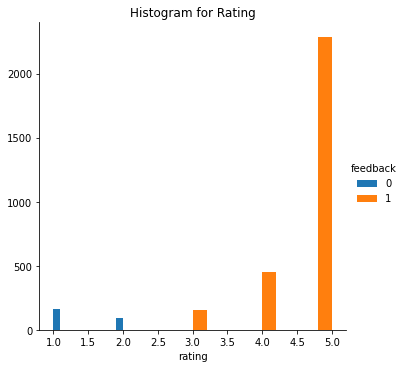

In [16]:
sns.FacetGrid(data,hue='feedback',height=5)\
  .map(plt.hist,'rating')\
  .add_legend();
plt.title('Histogram for Rating')

plt.show()

**1.For Ratings 3 , 4 , and 5 we have positive review feedback** 


**2.For Ratings 1 and 2 we have negative review feedback**

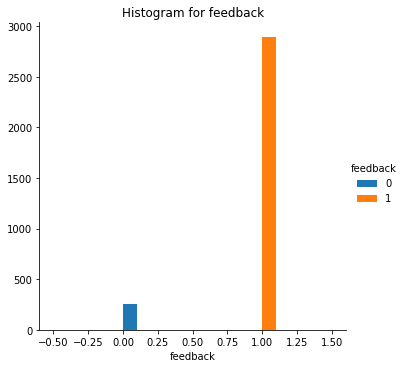

In [17]:
sns.FacetGrid(data,hue='feedback',height=5)\
  .map(plt.hist,'feedback')\
  .add_legend();
plt.title('Histogram for feedback')

plt.show()

**The Count of positive feedback is more which ultimately helps the Service Provider to analyse the response of customers !**

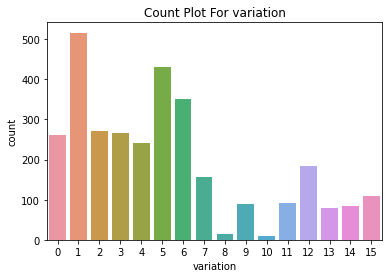

In [18]:
sns.countplot(x='variation',data=data)
plt.title('Count Plot For variation')
plt.show()

**The above plot shows the different variations in product with respect to its counts**

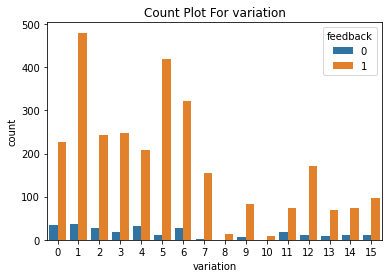

In [19]:
sns.countplot(x='variation',hue='feedback',data=data)
plt.title('Count Plot For variation')
plt.show()

**1.The observation is almost every 16 variation of the product is having higher positive feedback than negative feedback**

**2. Variation of labelled number 8 is having less count but 98 % review is noticed positive**

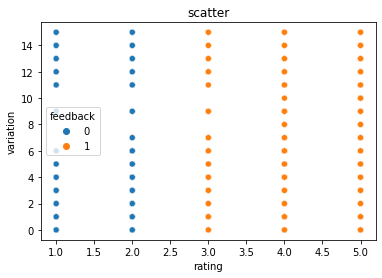

In [20]:
sns.scatterplot(x='rating',y='variation',data=data,hue='feedback')
plt.title('scatter')

plt.show()

**1.The above plot indicates the ratings with respect to variation**

**2. Higher positive feedback is noticed for every variance**

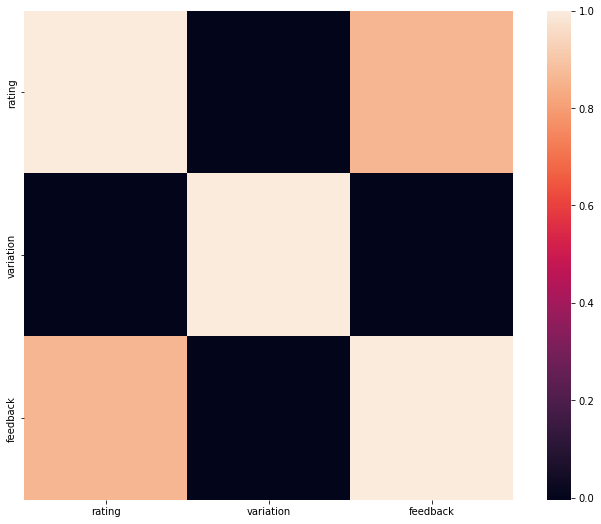

In [21]:
visual=plt.figure(figsize=(12,9))
sns.heatmap(data.corr(),square=True)
plt.show()

**1. Positive Correlation = feedback and rating**

**2.Negative Correlation =** 

**a.variation and rating**

**b.variation and feedback**


In [ ]:

import nltk
nltk.download('all')
nltk.download('stopwords')

In [23]:
#cleaning the text
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [24]:
reviews=[]
for i in range(len(data)):
    review=re.sub('[^a-zA-Z]',' ',data['verified_reviews'][i])
    review=review.lower()
    review=review.split()
    ps = PorterStemmer()
    review=[ps.stem(word) for word in review if  word not in set(stopwords.words('english'))]
    review= ' '.join(review)
    reviews.append(review)

In [ ]:
reviews


In [26]:
#Creating a bag of words that contains all the unique words in all the reviews
#Each column in X will represent each word
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(reviews).toarray()
Y=data['feedback']


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.3,random_state=0)

In [28]:
len(x_train)

2205

In [29]:
len(x_test)

945

In [30]:
len(y_train)

2205

In [31]:
len(y_test)

945

In [32]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit_transform(x_train)
std.fit(x_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

# 5.Model Training

**01.LOGISTIC REGRRESION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

log_reg=LogisticRegression()

parametre={
    'penalty':['l2'],
    'C':[1.0,2.0,3.0,4.0],
    'random_state':[None],
    'solver':['lbfgs'],
    'max_iter':[100,400,600,1000]
}

rv=RandomizedSearchCV(log_reg,parametre)
rv.fit(x_train,y_train)

In [34]:
rv.best_params_

{'C': 4.0,
 'max_iter': 400,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs'}

In [35]:
rv.best_score_

0.9387755102040817

In [36]:
log_reg=LogisticRegression(solver='lbfgs',
 random_state= None,
 penalty= 'l2',
 max_iter= 1000,
 C= 4.0)

log_reg.fit(x_train,y_train)

LogisticRegression(C=4.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pred=log_reg.predict(x_test)

In [38]:
# Accuracy score of train and test data
print("Train Data",log_reg.score(x_train,y_train)*100)
print("Test Data",log_reg.score(x_test,y_test)*100)

Train Data 98.91156462585035
Test Data 93.96825396825396


In [39]:
# Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))

[[ 29  46]
 [ 11 859]]


In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.39      0.50        75
           1       0.95      0.99      0.97       870

    accuracy                           0.94       945
   macro avg       0.84      0.69      0.74       945
weighted avg       0.93      0.94      0.93       945



**Test Accuracy obtained from LOGISTIC REGRESSION is 93.96%**

**02. DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

DT = DecisionTreeClassifier()

parameters={'criterion':['gini'],
            'splitter': ['best','random'],
           'max_depth':[2,10,20,25,40,None],
           'min_samples_split':[2,4,5,10,12],
           'min_samples_leaf':[1,2,3,6]}
           
RS=RandomizedSearchCV(DT,parameters)
RS.fit(x_train,y_train)

In [42]:
RS.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'splitter': 'best'}

In [43]:
RS.best_score_

0.9233560090702948

In [44]:
DT=DecisionTreeClassifier(criterion ='gini',
 max_depth= 10,
 min_samples_leaf= 1,
 min_samples_split= 2,
 splitter= 'best')
DT.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
#predicting testing data
y_pred=DT.predict(x_test)

In [46]:
#calculation of accuracy score
print('Train Data Score',accuracy_score(y_train,DT.predict(x_train))*100)
print('Test Data Score',accuracy_score(y_test,DT.predict(x_test))*100)

Train Data Score 95.41950113378684
Test Data Score 92.6984126984127


In [47]:
print(confusion_matrix(y_test,y_pred))

[[ 16  59]
 [ 10 860]]


In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.21      0.32        75
           1       0.94      0.99      0.96       870

    accuracy                           0.93       945
   macro avg       0.78      0.60      0.64       945
weighted avg       0.91      0.93      0.91       945



**Test Accuracy obtained from DECISION TREE is 92.59%**

**03.KNN CLASSIFIER**

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
KNN=KNeighborsClassifier()
para_meter={'n_neighbors':[3,10,2],
            'weights':['uniform', 'distance'],
            'algorithm':['auto']
            
}

gsv=GridSearchCV(KNN,para_meter)
gsv.fit(x_train,y_train)

In [50]:
gsv.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}

In [51]:
gsv.best_score_

0.926530612244898

In [52]:
%%time
KNN=KNeighborsClassifier(weights ='distance',
 n_neighbors= 3,
 algorithm= 'auto')
KNN.fit(x_train,y_train)

CPU times: user 790 ms, sys: 5.97 ms, total: 796 ms
Wall time: 798 ms


In [53]:
y_pred=KNN.predict(x_test)

In [54]:
# Accuracy score of train and test data
print("Train Data",KNN.score(x_train,y_train)*100)
print("Test Data",KNN.score(x_test,y_test)*100)

Train Data 99.27437641723355
Test Data 93.43915343915344


In [55]:
 #Confusion matrix
print(confusion_matrix(y_test,y_pred))

[[ 18  57]
 [  5 865]]


In [56]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.24      0.37        75
           1       0.94      0.99      0.97       870

    accuracy                           0.93       945
   macro avg       0.86      0.62      0.67       945
weighted avg       0.93      0.93      0.92       945



**Test Accuracy obtained from KNN is 93.43%**





# 6.Conclusion

**Test Accuracy obtained from LOGISTIC REGRESSION is 93.96%**

**Test Accuracy obtained from DECISION TREE is 92.59%**

**Test Accuracy obtained from KNN is 93.43%**

